In [1]:
#First import all the modules we need 
import electroPyy.core.Filters as filt 
import electroPyy.io.WinWcpRawIO as win
import electroPyy.core.DetectPeaks as DP
import numpy as np
from matplotlib import pyplot as plt

Neo is already installed, that's perfect :)


In [2]:
#Create a reader object, containing the file
reader = win('U:/RAW DATA/Controls/Granule Cell Spiking RT/GC_1.wcp')

#Parse header: new in neo 0.8
reader.parse_header()

#Detect the number of sweeps (optional)
nb_sweeps = reader.header['nb_segment'][0]

#Get the sampling rate
sampling_rate = reader.get_signal_sampling_rate()

#Extract the raw signals
raw_sigs = reader.get_analogsignal_chunk(block_index=0, seg_index=0, 
                                         i_start=0, 
                                         i_stop=-1,
                                         channel_indexes=[0])

#Rescale the signal (new in neo 0.8)
signal = reader.rescale_signal_raw_to_float(raw_sigs, dtype='float64').ravel()
print (signal)

[2.74666585 2.74666585 4.57777642 ... 4.57777642 0.30518509 0.91555528]


In [3]:
#Create a time vector
time_vector = np.arange(0,len(signal),1)/sampling_rate

#Filter the signal
filtered_signal = filt.bandpass(signal,axis=0, freq_low=50,freq_high=1000,N=8, sample_rate=sampling_rate)

#Detect the spikes
spike_indexes = DP.indexes(filtered_signal,mph=-10,mpd=10, threshold=0,kpsh=True,valley=True)
print (spike_indexes)

[33012 33365 33721 34163 34690 35191 35699 36179 36693 37255 37813 38334
 38874 39458 40092 40638 41124 41655 42170 42788 43441 44050 44731 45402
 45987 46540 47280 47837 48514 49265 49951 50759 51910 53629 55292]


Text(0.5, 0, 'Time (s)')

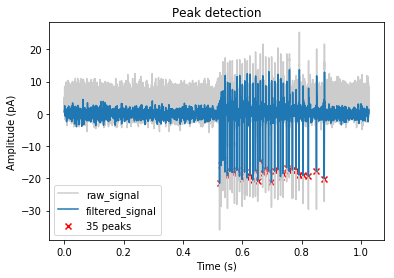

In [4]:
#Plot the result
plt.plot(time_vector,signal,label='raw_signal',color='0.8')
plt.plot(time_vector,filtered_signal,label='filtered_signal')
plt.scatter(time_vector[spike_indexes],filtered_signal[spike_indexes],color='red',label='{} peaks'.format(len(spike_indexes)),marker='x')
plt.title('Peak detection')
plt.legend(loc='best')
plt.ylabel('Amplitude (pA)')
plt.xlabel('Time (s)')